# Single label Classifier - AF Detection

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import sys
sys.path.append("../../tutorials/fastai/old/") # go to parent dir

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

from sklearn import metrics
from sklearn.metrics import f1_score, fbeta_score, make_scorer

import mlflow
import mlflow.sklearn


Bad key "text.kerning_factor" on line 4 in
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


## Helper functions

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
def print_fscores(m, x, y):
    res = [f1_score(y, m.predict(x), average='weighted'), fbeta_score(y, m.predict(x), beta=2)]
    print(res)

## Now we can choose which lead data to load

### Lead 1 data:

In [5]:
df_raw = pd.read_feather('datasets/base/pyhs-raw-lead1-corrected')
display_all(df_raw.T)

0            1            2            3     \
age                      64           24           59           14   
sex                       1            1            0            1   
fmax                8.20328      2.15043      1.05485      7.64504   
mean_RR             4460.78      9963.95      7031.67      6695.09   
mean_R_Peaks         190690       161291       228946  4.04914e+06   
mean_T_Peaks        84.1667      183.905      120.467      56.7143   
mean_P_Peaks        77.6667      44.0476      58.7333      57.1905   
mean_Q_Peaks         -32.75     -38.1905        -36.2     -148.619   
mean_S_Peaks       -46.6667     -212.048     -130.267     -121.952   
median_RR              4017         9914         6993         6660   
median_R_Peaks       163434       245336       183364  4.22689e+06   
std_RR              2788.58      5793.79      4059.13      4090.41   
std_R_Peaks          170403       120275       214377       884262   
var_RR          8.23363e+06  3.43673e+07  1.70447e+07  1.75282e+07   
var_R_Peaks     3.07451e+10  1.48104e+10  4.75421e+10  8.19154e+11   
skew_RR            0.326896   0.00822937    0.0160395    0.0310137   
skew_R_Peaks       0.452789   -0.0122815     0.102263     -4.32584   
kurt_RR             -1.1146     -1.19623     -1.17866     -1.22044   
kurt_R_Peaks       -1.28517     -1.95524     -1.85952      16.8351   
mean_P_Onsets       4617.67      10309.6      6736.27      6795.24   
mean_T_Offsets      5106.17      10776.3       7255.6      7248.29   
HRV                 300.262      252.052       247.39      319.845   
label                   PAC       Normal          PAC       Normal   

                       4            5            6            7     \
age                      40           64           56           76   
sex                       1            0            0            0   
fmax                2.18261      3.89556      17.0068      1.80072   
mean_RR             5615.25       9609.8      4754.85      4782.45   
mean_R_Peaks    1.30268e+06       280331       331673       104983   
mean_T_Peaks            196       133.88      63.4167      60.7857   
mean_P_Peaks        40.8182         2.92         0.25      67.6429   
mean_Q_Peaks       -218.636        -70.8     -13.3333     -26.3571   
mean_S_Peaks       -259.455       -80.24     -157.833     -129.214   
median_RR              5640         9780         4879         4504   
median_R_Peaks  1.11847e+06      28940.1        13556       102426   
std_RR              3206.38      5480.42       2831.8      3017.22   
std_R_Peaks     1.26993e+06       268252       354536        44664   
var_RR          1.07279e+07  3.06357e+07  8.33985e+06  9.53712e+06   
var_R_Peaks     1.68284e+12  7.33984e+10  1.30724e+11  2.08987e+09   
skew_RR           -0.014445   -0.0355583    0.0221538    0.0949298   
skew_R_Peaks      0.0459666     0.163273     0.207103   0.00224062   
kurt_RR             -1.2168     -1.19116     -1.09702     -1.29848   
kurt_R_Peaks       -1.94023     -1.80995     -1.88757    -0.886534   
mean_P_Onsets       5709.27      9375.28       4810.5      5261.14   
mean_T_Offsets      6233.82      9916.24      5340.17      5768.57   
HRV                 237.255      194.175      205.367      239.317   
label                  RBBB        I-AVB           AF           AF   

                       8            9            10           11    \
age                      89           42           80           62   
sex                       0            1            1            0   
fmax                4.30172      1.40056     0.785939      3.36088   
mean_RR              4958.5      5027.26      7077.64      15260.4   
mean_R_Peaks    1.52599e+06       186787       179436  2.54788e+06   
mean_T_Peaks        39.4615      203.538      44.8947      6.87179   
mean_P_Peaks        10.7857      33.4615      31.7368      28.8718   
mean_Q_Peaks       -74.3571     -87.1538     -20.8947     -116.333   
mean_S_Peaks         -137.5    

### Lead 2 data seems to give better results:

In [5]:
df_raw = pd.read_feather('datasets/corrected/pyhs-raw-lead2-corrected')
display_all(df_raw.T)

0            1            2            3     \
age                      64           24           59           14   
sex                       1            1            0            1   
fmax                4.60184      1.05021      1.05485      4.57274   
mean_RR             5164.82      9965.07      7262.19         6977   
mean_R_Peaks    3.21419e+06  1.42354e+06       782051       544773   
mean_T_Peaks        115.636       371.35      172.267      108.762   
mean_P_Peaks        13.1818     -19.5714     -8.73333      44.0476   
mean_Q_Peaks       -114.364     -114.714     -95.9333     -72.4762   
mean_S_Peaks       -54.0909      -270.81     -39.0667     -157.095   
median_RR              5166         9920         7150         7275   
median_R_Peaks   4.3649e+06  2.37452e+06      43328.4       615665   
std_RR              2986.46      5793.85      4186.15      4060.39   
std_R_Peaks     2.39316e+06  1.26495e+06       779588       204638   
var_RR          9.47635e+06   3.4368e+07   1.8108e+07  1.72036e+07   
var_R_Peaks     6.08516e+12   1.6382e+12  6.28016e+11  4.36973e+10   
skew_RR           0.0022395   0.00818842   0.00841972    -0.099483   
skew_R_Peaks      -0.497951   -0.0336479     0.119925     -2.12018   
kurt_RR            -1.25653     -1.19657     -1.19276     -1.21384   
kurt_R_Peaks       -1.59331     -1.98235     -1.89579      2.76596   
mean_P_Onsets       5029.09      10306.8       6725.6       6830.1   
mean_T_Offsets      5508.91          NaN      7256.93      7244.29   
HRV                 324.786       250.69      244.448      297.769   
label                   PAC       Normal          PAC       Normal   

                       4            5            6            7     \
age                      40           64           56           76   
sex                       1            0            0            0   
fmax                8.54856      3.89556      1.30052       7.0028   
mean_RR                4981      9610.75      4971.92       5241.4   
mean_R_Peaks    1.03544e+06       464155       366945   1.1063e+06   
mean_T_Peaks        25.8182       175.64       164.25      40.2667   
mean_P_Peaks        95.2727         16.6      1.33333           34   
mean_Q_Peaks       -62.3636      -113.76     -55.5833     -42.4667   
mean_S_Peaks       -360.364       -43.32     -166.333     -165.267   
median_RR              4715         9782         5016         5534   
median_R_Peaks  1.70297e+06      57474.8        60437  1.33159e+06   
std_RR               3011.1      5480.61      2985.73      2827.17   
std_R_Peaks          842957       436835       353303       573251   
var_RR           9.5439e+06  3.06378e+07  9.28603e+06  8.41357e+06   
var_R_Peaks     7.47975e+11  1.94642e+11  1.30024e+11  3.45912e+11   
skew_RR            0.134001   -0.0355991   -0.0700177    -0.166069   
skew_R_Peaks      -0.406748     0.132798      0.19688      -1.1105   
kurt_RR            -1.14666     -1.19105     -1.23791     -1.14911   
kurt_R_Peaks       -1.83252      -1.8626     -1.82098    -0.275214   
mean_P_Onsets       5675.82      9379.76       4792.5       5127.2   
mean_T_Offsets      6216.55      9913.76      5332.83      5652.93   
HRV                 286.387      194.706      212.797       265.59   
label                  RBBB        I-AVB           AF           AF   

                       8            9            10           11    \
age                      89           42           80           62   
sex                       0            1            1            0   
fmax                4.30172      2.10084      2.21492      1.57252   
mean_RR             5190.95      4933.36      7069.45      15739.2   
mean_R_Peaks         791539  1.67609e+06       617527  2.65317e+06   
mean_T_Peaks        5.53846     -24.1538     -6.31579     -20.8421   
mean_P_Peaks        56.7143      58.9231      3.63158      92.8649   
mean_Q_Peaks       -50.9286      12.7692    -0.315789     -52.1316   
mean_S_Peaks       -104.214    

In [6]:
labels = pd.get_dummies(df_raw['label'])
labels.describe()

AF        I-AVB         LBBB       Normal          PAC  \
count  6877.000000  6877.000000  6877.000000  6877.000000  6877.000000   
mean      0.177548     0.104988     0.028937     0.133488     0.079104   
std       0.382160     0.306560     0.167642     0.340127     0.269921   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               PVC         RBBB          STD          STE  
count  6877.000000  6877.000000  6877.000000  6877.000000  
mean      0.091173     0.243566     0.114294     0.026901  
std       0.287877     0.429265     0.318191     0.161807  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000

In [7]:
df_raw['PT_duration'] = df_raw['mean_T_Offsets'] - df_raw['mean_P_Onsets']
df_raw.drop(['mean_T_Offsets', 'mean_P_Onsets'], axis=1, inplace=True)

## Split between Train and Validation Datasets

### Training Set (80%) - Validation (20%)

In [8]:
df_af = df_raw[(df_raw.loc[:, 'label'] == 'AF')]
df_af.reset_index(inplace=True)
df_train_af = df_af.sample(frac=0.8)

id_train = list(df_train_af.index)
id_eval = [y for y in range(len(df_af)) if y not in id_train]
df_eval_af = df_af.loc[id_eval,:]
len(df_eval_af), len(df_train_af), len(df_af)

(244, 977, 1221)

In [9]:
df_rest = df_raw[(df_raw.loc[:, 'label'] != 'AF')]
df_rest.reset_index(inplace=True)
df_train_rest = df_rest.sample(frac=0.8)

id_train = list(df_train_rest.index)
id_eval = [y for y in range(len(df_rest)) if y not in id_train]

df_eval_rest = df_rest.loc[id_eval,:]
len(df_eval_rest), len(df_train_rest), len(df_rest)

(1131, 4525, 5656)

### We check to see if the labels we sampled in the same proportion as they appear in the original dataset

In [10]:
labels = pd.get_dummies(df_train_rest['label'])
labels.describe()

I-AVB         LBBB       Normal          PAC          PVC  \
count  4525.000000  4525.000000  4525.000000  4525.000000  4525.000000   
mean      0.127956     0.033812     0.162873     0.097017     0.115138   
std       0.334078     0.180765     0.369291     0.296013     0.319224   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              RBBB          STD         STE  
count  4525.000000  4525.000000  4525.00000  
mean      0.293702     0.138343     0.03116  
std       0.455507     0.345297     0.17377  
min       0.000000     0.000000     0.00000  
25%       0.000000     0.000000     0.00000  
50%       0.000000     0.000000     0.00000  
75%       1.000000     0.000000     0.00000  
max       1.000000     1.000000     1.00000

### Renaming everything else as "Non-AF" in both sets

In [11]:
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'I-AVB'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'LBBB'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'Normal'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'PAC'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'PVC'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'RBBB'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'STD'] = 'Non-AF'
df_train_rest['label'][df_train_rest.loc[:, 'label'] == 'STE'] = 'Non-AF'

df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'I-AVB'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'LBBB'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'Normal'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'PAC'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'PVC'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'RBBB'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'STD'] = 'Non-AF'
df_eval_rest['label'][df_eval_rest.loc[:, 'label'] == 'STE'] = 'Non-AF'

/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

### We merge both sets into one

In [12]:
df_train = pd.concat([df_train_af, df_train_rest])
df_eval = pd.concat([df_eval_af, df_eval_rest])
df_train.drop('index', inplace=True, axis=1)
df_eval.drop('index', inplace=True, axis=1)

df_train

age  sex      fmax       mean_RR  mean_R_Peaks  mean_T_Peaks  \
690    84    0  7.468929   8378.285714  2.959922e+06    103.043478   
534    45    0  4.437374   5810.357143  1.389484e+06    117.727273   
603    76    0  4.001601   4926.421053  3.096252e+05     93.125000   
9      77    1  0.100040   4916.555556  5.677979e+05     32.312500   
617    55    1  2.400960   5183.454545  2.389570e+06     -1.476190   
...   ...  ...       ...           ...           ...           ...   
4758   51    0  4.201681   5542.000000  3.192375e+06     47.214286   
5454   75    0  2.501000   5022.000000  7.719283e+05     54.000000   
2910   59    1  8.040201   6010.500000  4.440316e+06     48.434783   
3563   80    0  3.852346   8816.057143  1.665723e+06    280.545455   
3554   85    1  0.913349  21158.230769  4.715308e+05      3.230769   

      mean_P_Peaks  mean_Q_Peaks  mean_S_Peaks  median_RR  ...   std_R_Peaks  \
690      80.130435    -69.043478    -89.478261     8807.0  ...  1.301678e+06   
534      43.363636    -84.136364   -221.590909     5454.0  ...  6.374220e+05   
603      36.062500    -32.937500   -132.000000     4904.0  ...  1.760210e+05   
9        62.562500    -27.750000   -445.937500     4824.0  ...  1.466578e+05   
617      26.523810    -97.285714    -41.619048     5109.0  ...  6.560751e+05   
...            ...           ...           ...        ...  ...           ...   
4758     91.714286   -130.428571   -130.500000     5688.0  ...  2.172804e+06   
5454     89.083333    -52.833333   -665.916667     5011.0  ...  7.027048e+05   
2910    156.521739   -120.391304   -155.869565     5992.0  ...  4.128544e+05   
3563     40.714286   -141.545455   -149.909091     8282.0  ...  1.207224e+06   
3554     50.692308    -51.820513   -260.769231    21260.0  ...  4.465182e+05   

            var_RR   var_R_Peaks   skew_RR  skew_R_Peaks   kurt_RR  \
690   2.506126e+07  1.757119e+12  0.007658     -0.385810 -1.188885   
534   1.155630e+07  4.213552e+11  0.123349     -1.169798 -1.149438   
603   9.591394e+06  3.270469e+10  0.028636     -0.394802 -1.175701   
9     9.629537e+06  2.277372e+10  0.073021     -3.011382 -1.171292   
617   8.622798e+06  4.509315e+11 -0.005897     -2.106795 -1.184330   
...            ...           ...       ...           ...       ...   
4758  9.364299e+06  4.969556e+12 -0.108675     -0.630085 -1.264946   
5454  9.037517e+06  5.135457e+11  0.004985      0.047216 -1.210553   
2910  1.242293e+07  1.778596e+11  0.009571      0.568470 -1.209408   
3563  2.553321e+07  1.500254e+12  0.094554     -0.506195 -1.270119   
3554  1.580520e+08  2.019679e+11  0.013670     -0.021828 -1.229720   

      kurt_R_Peaks         HRV   label  PT_duration  
690       2.049293  322.567191      AF   514.782609  
534      -0.059711  218.234074      AF   491.454545  
603      -1.006825  281.372035      AF   521.500000  
9         9.200581  292.677397      AF   456.500000  
617       5.150699  230.341051      AF   443.714286  
...            ...         ...     ...          ...  
4758     -1.378577  275.792638  Non-AF   565.857143  
5454     -1.931547  202.110861  Non-AF   508.500000  
2910     -0.672524  248.836685  Non-AF   452.173913  
3563     -1.708189  257.220208  Non-AF          NaN  
3554     -1.956994  281.438236  Non-AF   664.410256  

[5502 rows x 22 columns]

In [13]:
df_eval

age  sex      fmax      mean_RR  mean_R_Peaks  mean_T_Peaks  \
11     64    1  2.701080  5224.434783  6.143282e+05     61.500000   
20     56    0  3.286653  7256.200000  3.040696e+06     49.869565   
22     82    1  1.000235  8621.485714  7.006126e+05    171.235294   
23     60    1  1.100440  4889.263158  2.364681e+05      7.333333   
27     55    0  3.201281  4929.200000  1.472091e+06     62.181818   
...   ...  ...       ...          ...           ...           ...   
5612   46    0  2.501000  4859.571429  1.146780e+07     -3.500000   
5632   70    1  1.700680  4997.111111  7.135225e+05    -62.250000   
5636   66    0  1.202368  5506.900000  4.245310e+06    -55.461538   
5640   62    1  0.922023  7609.515152  2.802675e+06    118.619048   
5642   91    1  1.300520  5256.454545  4.149614e+05    145.666667   

      mean_P_Peaks  mean_Q_Peaks  mean_S_Peaks  median_RR  ...   std_R_Peaks  \
11       33.090909    -19.318182    -35.545455     5228.0  ...  1.578484e+05   
20       -0.304348    -91.000000   -159.739130     7642.0  ...  1.769235e+06   
22      -19.000000    -66.333333    -66.777778     9026.0  ...  6.788972e+05   
23       47.333333     -6.333333   -255.866667     5068.0  ...  1.196508e+05   
27       33.363636    -31.227273   -183.772727     4934.0  ...  3.809210e+05   
...            ...           ...           ...        ...  ...           ...   
5612     35.461538   -178.307692   -131.333333     4836.0  ...  3.217301e+06   
5632    106.117647    -24.352941   -286.294118     4984.0  ...  1.981135e+05   
5636    103.461538    -50.076923   -167.230769     5672.0  ...  3.116335e+06   
5640    107.571429   -120.571429    -74.666667     7458.0  ...  2.096584e+06   
5642      7.916667    -98.083333      0.500000     5304.0  ...  3.210294e+05   

            var_RR   var_R_Peaks   skew_RR  skew_R_Peaks   kurt_RR  \
11    8.956350e+06  2.604868e+10  0.019048     -1.504348 -1.218515   
20    1.678030e+07  3.238130e+12 -0.165809     -1.014608 -1.070114   
22    2.629901e+07  4.744573e+11 -0.095227      0.114442 -1.297903   
23    9.576620e+06  1.511167e+10 -0.038987     -1.182044 -1.198018   
27    9.209781e+06  1.511467e+11  0.024144     -1.824785 -1.320021   
...            ...           ...       ...           ...       ...   
5612  1.072653e+07  1.114726e+13  0.044006     -3.194622 -1.252073   
5632  9.681871e+06  4.155772e+10  0.023640     -1.922294 -1.231320   
5636  1.169153e+07  1.022268e+13 -0.067087     -0.595961 -1.206711   
5640  1.962710e+07  4.533027e+12  0.027273     -0.505209 -1.170172   
5642  8.554403e+06  1.079675e+11 -0.082080     -0.309249 -1.130789   

      kurt_R_Peaks         HRV   label  PT_duration  
11        2.567179  221.363954      AF   333.363636  
20       -0.882557  252.875054      AF   557.130435  
22       -1.784185  272.644403      AF          NaN  
23       -0.206820  285.320288      AF   547.733333  
27        4.719835  199.978957      AF   434.363636  
...            ...         ...     ...          ...  
5612      8.528951  384.949847  Non-AF          NaN  
5632      4.943800  287.834818  Non-AF          NaN  
5636     -1.599378  303.062613  Non-AF   454.923077  
5640     -1.656824  247.402948  Non-AF   548.190476  
5642     -1.825574  246.319092  Non-AF   481.333333  

[1375 rows x 22 columns]

### Check to see if training set has the same AF and Non-AF proportion as in the original dataset

In [14]:
labels = pd.get_dummies(df_train['label'])
labels.describe()

AF       Non-AF
count  5502.000000  5502.000000
mean      0.177572     0.822428
std       0.382187     0.382187
min       0.000000     0.000000
25%       0.000000     1.000000
50%       0.000000     1.000000
75%       0.000000     1.000000
max       1.000000     1.000000

### We process our datasets and train our model

In [64]:
X_train, y_train, nas = proc_df(df_train, 'label')
X_eval, y_eval, nas = proc_df(df_eval, 'label', na_dict=nas)

In [65]:
m_af = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m_af.fit(X_train, y_train)

m_af.score(X_train,y_train), m_af.score(X_eval, y_eval), m_af.oob_score_

CPU times: user 16.3 s, sys: 178 ms, total: 16.5 s
Wall time: 3.67 s


(1.0, 0.9323636363636364, 0.9247546346782988)

We compare the **R^2** metric with the **OOB R^2** so that we make sure we are not overfitting.

### Evaluation Metrics

print_fscores returns the sklearn [ f1_score, fbeta_score ] with beta = 2

This are the evaluation metrics we are actually interested in.

In [17]:
print_fscores(m_af, X_train, y_train)

[1.0, 1.0]


In [49]:
print_fscores(m_af, X_eval, y_eval)

[0.927259464237331, 0.976227932179689]


In [19]:
mlflow.set_experiment('AF_feature_testing')
with mlflow.start_run() as run:
    mlflow.log_params({'n_estimators': '1000', 'min_samples_leaf': '1', 'max_features': 'sqrt'})
    mlflow.log_param('n_Features', len(list(X_train.columns)))
    mlflow.log_metric('f1_score', f1_score(y_eval, m_af.predict(X_eval), average='weighted'))
    mlflow.log_metric('f2_score', fbeta_score(y_eval, m_af.predict(X_eval), beta=2))
    #mlflow.sklearn.log_model(m_af, "Model")  

INFO: 'AF_feature_testing' does not exist. Creating a new experiment


## Looking at Feature Importance

We calculate the feature importance using the MDI (Mean Decrease in Impurity) method, with is the default for sklearn's Random Forests

In [66]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,8), legend=False)

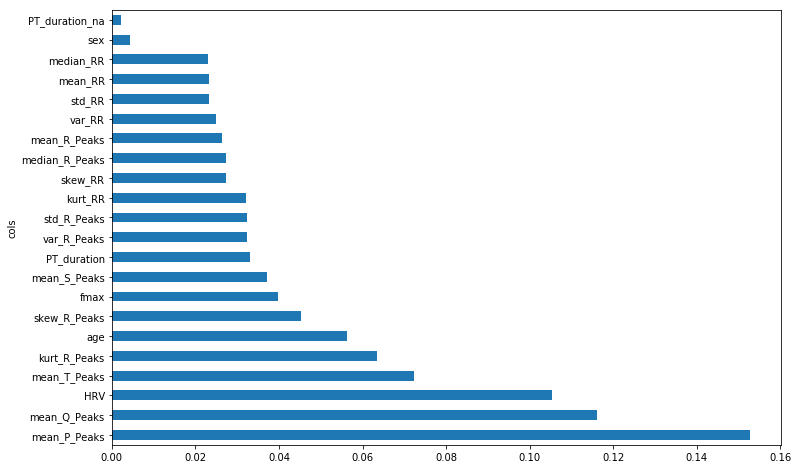

In [67]:
fi_mdi = rf_feat_importance(m_af, X_train)
plot_fi(fi_mdi);

We now calculate feature importance using the MDA (Mean Decrease in Accuracy) method to compare. We can pass our own score algorithm so we will use the beta score since is the metric we will be optimizing to.

For more information on how these are calculated please refer to [this link](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3).

In [22]:
from sklearn.inspection import permutation_importance

score_f = make_scorer(fbeta_score, beta=2)

%time res = permutation_importance(m_af, X_train, y_train, scoring=score_f, n_repeats=5, random_state=42, n_jobs=7)

CPU times: user 26.2 s, sys: 2.01 s, total: 28.2 s
Wall time: 45.3 s


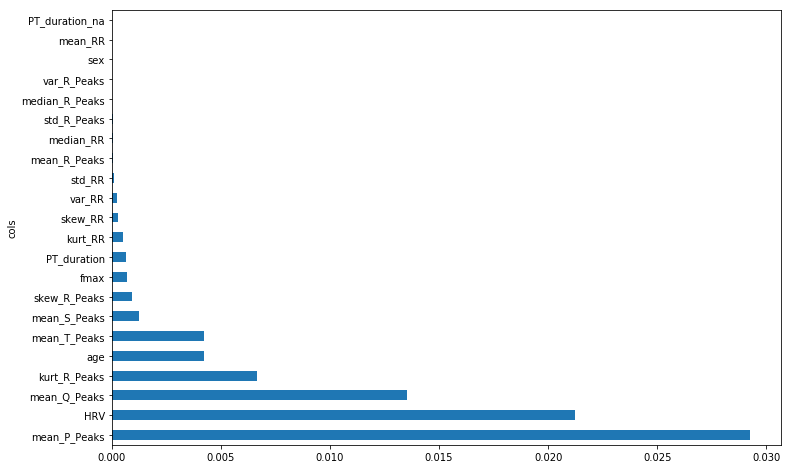

In [23]:
fi_mda = pd.DataFrame({'cols':X_train.columns, 'imp':res.importances_mean.T}).sort_values('imp', ascending=False)

plot_fi(fi_mda);

Although not the same, the results are similar and make sense from a physiological point of view.

### Lets optimize our model based on MDI results

In [71]:
thresh = 0.035
to_keep = list(fi_mdi[fi_mdi['imp'] > thresh].cols)

X_train_keep = X_train[to_keep]
X_eval_keep = X_eval[to_keep]

len(to_keep)

9

In [58]:
m_af = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m_af.fit(X_train_keep, y_train)

print_fscores(m_af, X_eval_keep, y_eval)

CPU times: user 14 s, sys: 268 ms, total: 14.2 s
Wall time: 3.58 s
[0.942515854023226, 0.9782417968064573]


In [35]:
mlflow.set_experiment('AF_feature_testing')
with mlflow.start_run() as run:
    mlflow.log_params({'n_estimators': '1000', 'min_samples_leaf': '1', 'max_features': 'sqrt'})
    mlflow.log_param('n_Features', len(list(X_train_keep.columns)))
    mlflow.log_param('threshold', thresh)
    mlflow.log_metric('f1_score', f1_score(y_eval, m_af.predict(X_eval_keep), average='weighted'))
    mlflow.log_metric('f2_score', fbeta_score(y_eval, m_af.predict(X_eval_keep), beta=2))
    # mlflow.sklearn.log_model(m_af, "Model")
                      

## Removing Redundant Features

By calculating a Dendrogram we look for features that may be providing the same information so we can remove them and end up with a cleaner model.

In [27]:
from scipy.cluster import hierarchy as hc

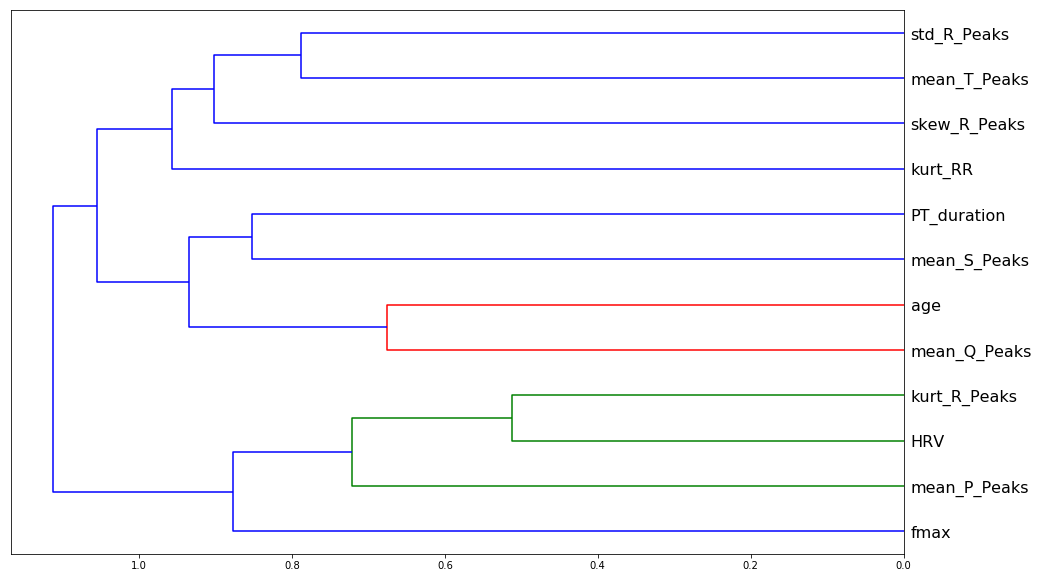

In [50]:
corr = np.round(scipy.stats.spearmanr(X_train_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_train_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Given that the variance can be obtained from the std, and viceversa it's no surprise they seem to provide the same information. Let's try and remove them.

In [29]:
to_drop = ['var_R_Peaks']
X_train_drop = X_train_keep.drop(to_drop, axis=1)
X_eval_drop = X_eval_keep.drop(to_drop, axis=1)

In [30]:
m_af = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='sqrt', n_jobs=7, oob_score=True)

%time m_af.fit(X_train_drop, y_train)

print_fscores(m_af, X_eval_drop, y_eval)

CPU times: user 13.5 s, sys: 218 ms, total: 13.8 s
Wall time: 3.31 s
[0.9406482696807386, 0.9789658194566169]


In [31]:
mlflow.set_experiment('AF_feature_testing')
with mlflow.start_run() as run:
    mlflow.log_params({'n_estimators': '1000', 'min_samples_leaf': '1', 'max_features': 'sqrt'})
    mlflow.log_param('n_Features', len(list(X_train_drop.columns)))
    mlflow.log_param('threshold', thresh)
    mlflow.log_metric('f1_score', f1_score(y_eval, m_af.predict(X_eval_drop), average='weighted'))
    mlflow.log_metric('f2_score', fbeta_score(y_eval, m_af.predict(X_eval_drop), beta=2))
    #mlflow.sklearn.log_model(m_af, "Model")

Now we removed some columns we check the feature importance in our new model to see if it changed due to interactions between our variables and one of the ones we discarded. 

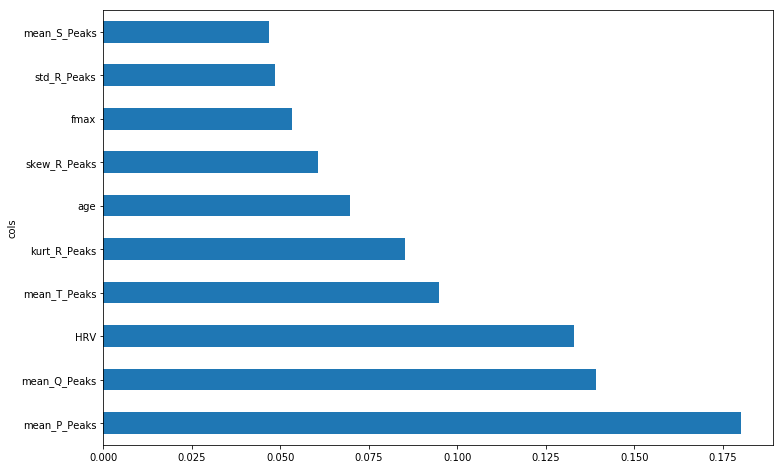

In [32]:
fi_mdi = rf_feat_importance(m_af, X_train_drop)
plot_fi(fi_mdi[:10]);